# IMPORT DATASETS AND LIBRARIES

In [67]:
# install seaborn library
# !pip install seaborn

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
# read the csv file 
life_expectancy_df = pd.read_csv('Life_Expectancy_Data.csv')

In [70]:
life_expectancy_df

Year      Status  ...  Income composition of resources  Schooling
0     2015  Developing  ...                            0.479       10.1
1     2014  Developing  ...                            0.476       10.0
2     2013  Developing  ...                            0.470        9.9
3     2012  Developing  ...                            0.463        9.8
4     2011  Developing  ...                            0.454        9.5
...    ...         ...  ...                              ...        ...
2933  2004  Developing  ...                            0.407        9.2
2934  2003  Developing  ...                            0.418        9.5
2935  2002  Developing  ...                            0.427       10.0
2936  2001  Developing  ...                            0.427        9.8
2937  2000  Developing  ...                            0.434        9.8

[2938 rows x 21 columns]

# EXPLORATORY DATA ANALYSIS AND VISUALIZATION

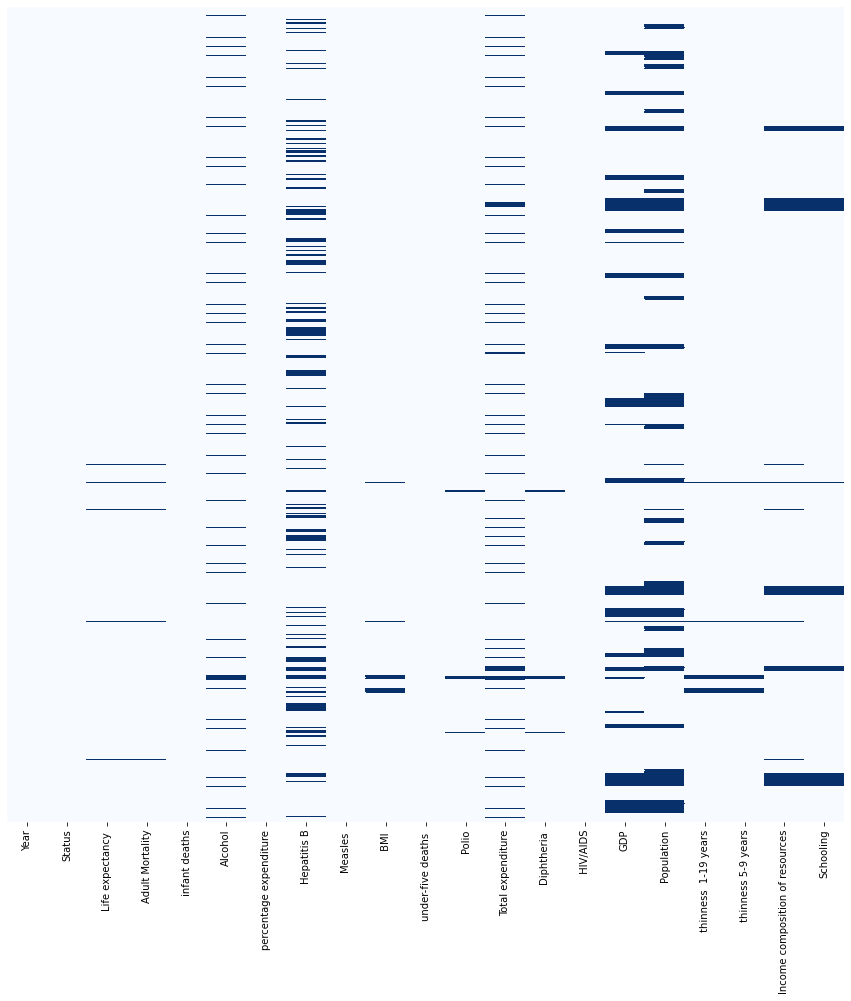

In [71]:
# check if there are any Null values
plt.figure(figsize=(15, 15))
sns.heatmap(life_expectancy_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [72]:
#lowercase
life_expectancy_df.columns = life_expectancy_df.columns.str.lower()

#replace white space with _
life_expectancy_df.columns = life_expectancy_df.columns.str.replace(' ', '_')

#rename columns
life_expectancy_df.rename({'life_expectancy_':'life_expectancy', 
                           'measles_':'measle', 
                           '_bmi_':'bmi', 
                           'under-five_deaths':'under_five_deaths',
                           'diphtheria_':'diphtheria',
                           '_hiv/aids': 'hiv/aids',
                           '_thinness__1-19_years':'thinness_1_to_19_years',
                           '_thinness_5-9_years':'thinness_5_to_9_years'}, axis=1, inplace=True) 

In [73]:
# check the dataframe info
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   status                           2938 non-null   object 
 2   life_expectancy                  2928 non-null   float64
 3   adult_mortality                  2928 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   alcohol                          2744 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   hepatitis_b                      2385 non-null   float64
 8   measle                           2938 non-null   int64  
 9   bmi                              2904 non-null   float64
 10  under-five_deaths_               2938 non-null   int64  
 11  polio                            2919 non-null   float64
 12  total_expenditure   

In [74]:
# statistical summary of the dataframe

life_expectancy_df.describe()

year  ...    schooling
count  2938.000000  ...  2775.000000
mean   2007.518720  ...    11.992793
std       4.613841  ...     3.358920
min    2000.000000  ...     0.000000
25%    2004.000000  ...    10.100000
50%    2008.000000  ...    12.300000
75%    2012.000000  ...    14.300000
max    2015.000000  ...    20.700000

[8 rows x 20 columns]

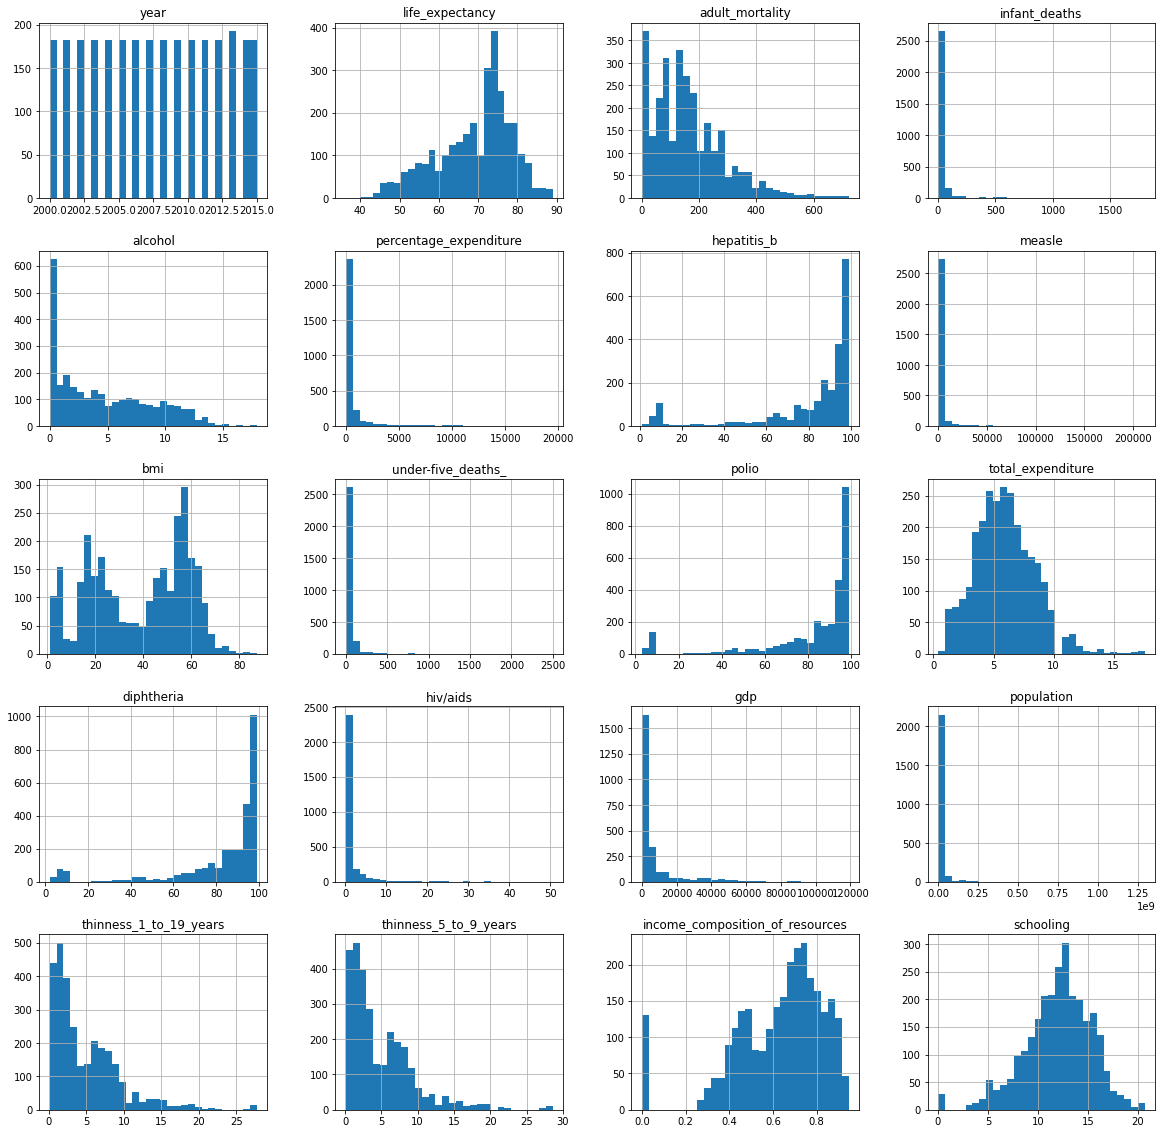

In [75]:
# plot the histogram
life_expectancy_df.hist(bins = 30, figsize = (20, 20));


<Figure size 1440x1440 with 0 Axes>

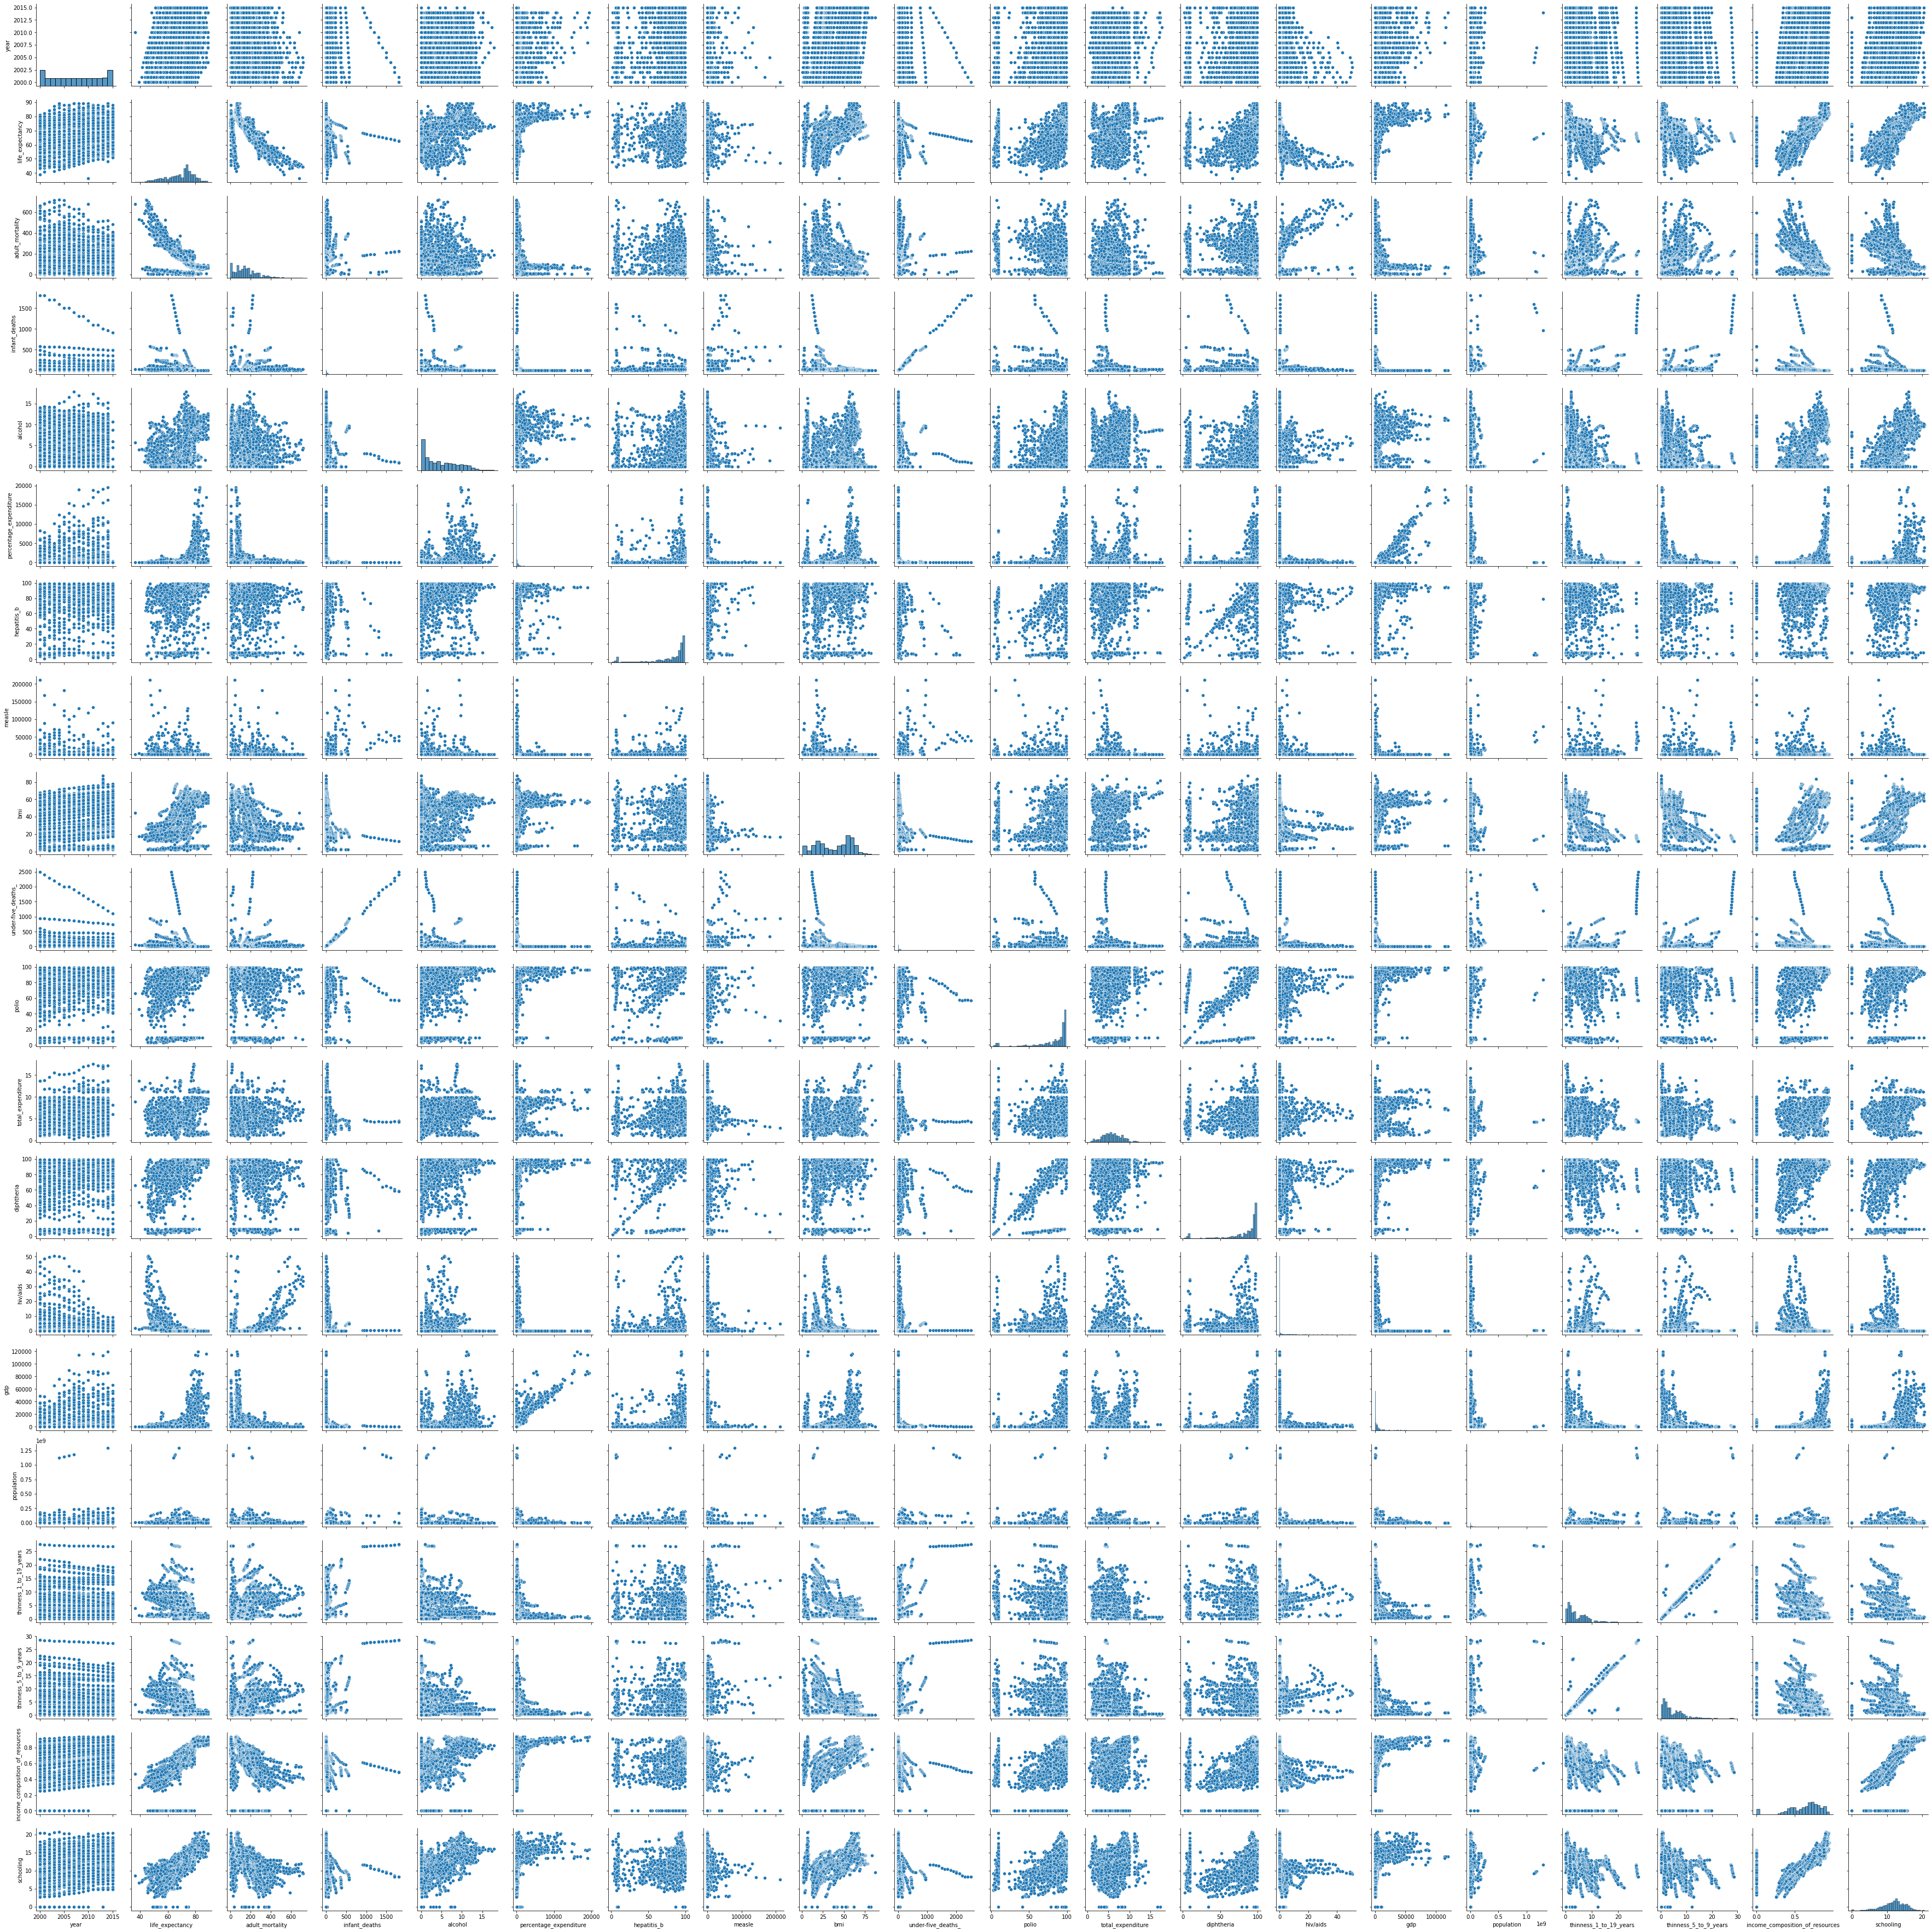

In [76]:
# plot pairplot
plt.figure(figsize = (20,20))
sns.pairplot(life_expectancy_df)

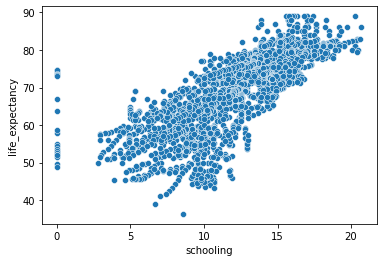

In [77]:
sns.scatterplot(data=life_expectancy_df,
               x='schooling',
               y='life_expectancy')

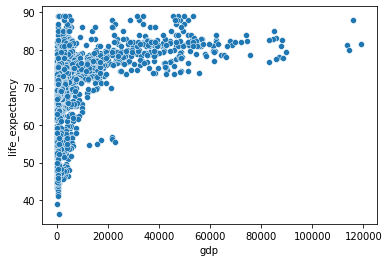

In [78]:
sns.scatterplot(data=life_expectancy_df,
               x='gdp',
               y='life_expectancy')

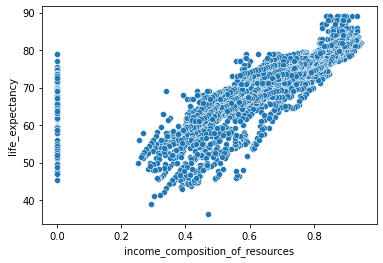

In [79]:
sns.scatterplot(data=life_expectancy_df,
               x='income_composition_of_resources',
               y='life_expectancy')

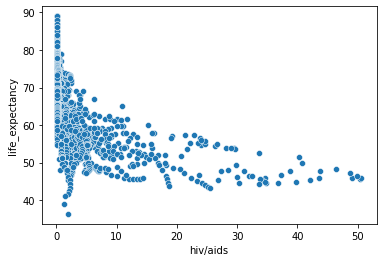

In [80]:
sns.scatterplot(data=life_expectancy_df,
               x='hiv/aids',
               y='life_expectancy')

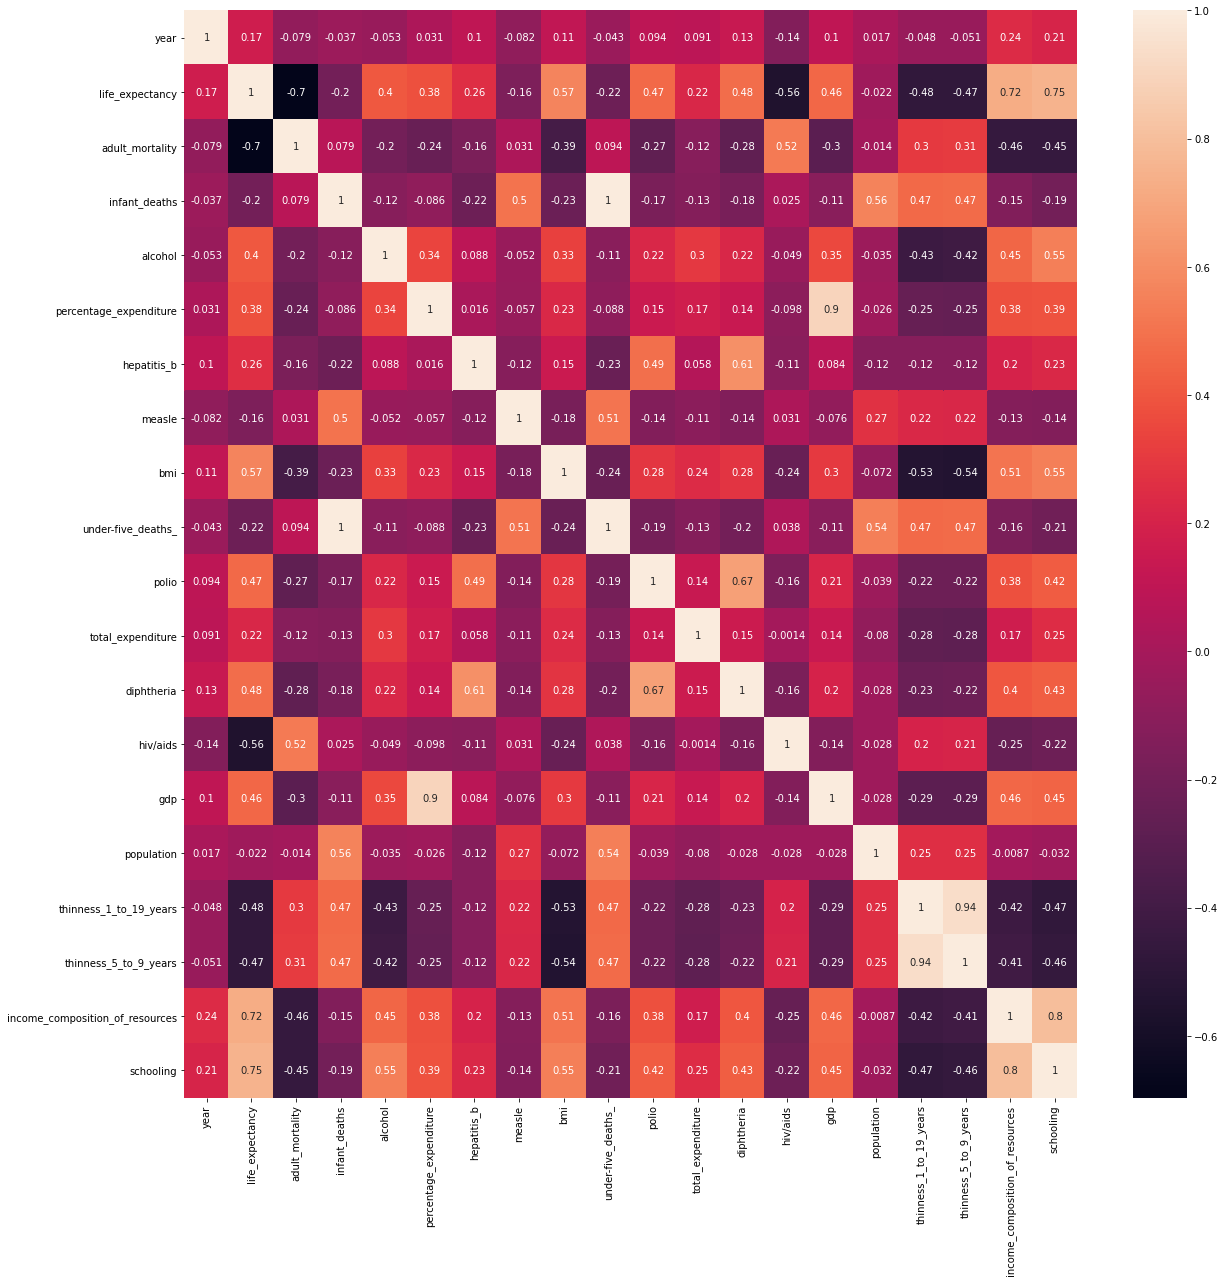

In [81]:
# plot the correlation matrix
plt.figure(figsize = (20,20))
corr_matrix = life_expectancy_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [82]:
life_expectancy_df

year      status  ...  income_composition_of_resources  schooling
0     2015  Developing  ...                            0.479       10.1
1     2014  Developing  ...                            0.476       10.0
2     2013  Developing  ...                            0.470        9.9
3     2012  Developing  ...                            0.463        9.8
4     2011  Developing  ...                            0.454        9.5
...    ...         ...  ...                              ...        ...
2933  2004  Developing  ...                            0.407        9.2
2934  2003  Developing  ...                            0.418        9.5
2935  2002  Developing  ...                            0.427       10.0
2936  2001  Developing  ...                            0.427        9.8
2937  2000  Developing  ...                            0.434        9.8

[2938 rows x 21 columns]

In [83]:
# checking the unique values in country to consider it as a categorical variable
life_expectancy_df['status'].nunique()

2

In [84]:
# perform one-hot encoding
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns = ['status'])

In [85]:
life_expectancy_df

year  life_expectancy  ...  status_Developed  status_Developing
0     2015             65.0  ...                 0                  1
1     2014             59.9  ...                 0                  1
2     2013             59.9  ...                 0                  1
3     2012             59.5  ...                 0                  1
4     2011             59.2  ...                 0                  1
...    ...              ...  ...               ...                ...
2933  2004             44.3  ...                 0                  1
2934  2003             44.5  ...                 0                  1
2935  2002             44.8  ...                 0                  1
2936  2001             45.3  ...                 0                  1
2937  2000             46.0  ...                 0                  1

[2938 rows x 22 columns]

In [86]:
# check the number of null values for the columns having null values
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]


life_expectancy                     10
adult_mortality                     10
alcohol                            194
hepatitis_b                        553
bmi                                 34
polio                               19
total_expenditure                  226
diphtheria                          19
gdp                                448
population                         652
thinness_1_to_19_years              34
thinness_5_to_9_years               34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [87]:
# since most of the are continous values we fill them with mean
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [88]:
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]

Series([], dtype: int64)

# CREATE TRAINING AND TESTING DATASET

In [89]:
# create train and test data
X = life_expectancy_df.drop(columns = ['life_expectancy'])
y = life_expectancy_df[['life_expectancy']]


In [90]:
X

year  adult_mortality  ...  status_Developed  status_Developing
0     2015            263.0  ...                 0                  1
1     2014            271.0  ...                 0                  1
2     2013            268.0  ...                 0                  1
3     2012            272.0  ...                 0                  1
4     2011            275.0  ...                 0                  1
...    ...              ...  ...               ...                ...
2933  2004            723.0  ...                 0                  1
2934  2003            715.0  ...                 0                  1
2935  2002             73.0  ...                 0                  1
2936  2001            686.0  ...                 0                  1
2937  2000            665.0  ...                 0                  1

[2938 rows x 21 columns]

In [91]:
y

life_expectancy
0                65.0
1                59.9
2                59.9
3                59.5
4                59.2
...               ...
2933             44.3
2934             44.5
2935             44.8
2936             45.3
2937             46.0

[2938 rows x 1 columns]

In [92]:
X.shape

(2938, 21)

In [93]:
y.shape

(2938, 1)

In [94]:
# convert the data type to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [95]:
# only take the numerical variables and scale them
X 

array([[2.015e+03, 2.630e+02, 6.200e+01, ..., 1.010e+01, 0.000e+00,
        1.000e+00],
       [2.014e+03, 2.710e+02, 6.400e+01, ..., 1.000e+01, 0.000e+00,
        1.000e+00],
       [2.013e+03, 2.680e+02, 6.600e+01, ..., 9.900e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.002e+03, 7.300e+01, 2.500e+01, ..., 1.000e+01, 0.000e+00,
        1.000e+00],
       [2.001e+03, 6.860e+02, 2.500e+01, ..., 9.800e+00, 0.000e+00,
        1.000e+00],
       [2.000e+03, 6.650e+02, 2.400e+01, ..., 9.800e+00, 0.000e+00,
        1.000e+00]], dtype=float32)

In [96]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [97]:
# scale the data
from sklearn.preprocessing import StandardScaler

#scale X
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

#scale y
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# TRAIN A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [98]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

model = LinearRegression(fit_intercept = True) 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# get accuracy
accuracy = model.score(X_test, y_test)
accuracy

0.8119539333921135

In [100]:
# get coefficient and intercept
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [[-0.00405049 -0.26094857  1.3001025   0.03219575  0.03396887 -0.03563748
  -0.02275261  0.10731174 -1.3232853   0.07920709  0.01397815  0.09288426
  -0.25532937  0.02628889  0.00134449 -0.02452831 -0.00284164  0.12101206
   0.22272515  0.03054972 -0.03054963]]
Linear Model Coefficient (b):  [6.274284e-08]


# EVALUATE MODEL

In [101]:
# make prediction
y_predict = model.predict(X_test)

In [102]:
y_predict

array([[-7.01823413e-01],
       [-7.72376478e-01],
       [-1.61540008e+00],
       [ 6.59630716e-01],
       [-8.02351892e-01],
       [ 1.27717280e+00],
       [-8.14487994e-01],
       [-1.64361584e+00],
       [ 7.85279989e-01],
       [ 8.49026918e-01],
       [ 3.94316107e-01],
       [ 4.23707753e-01],
       [-6.52742088e-01],
       [ 1.60376573e+00],
       [ 5.56584537e-01],
       [ 1.07647225e-01],
       [ 2.03284800e-01],
       [ 1.57682478e-01],
       [-1.63272083e+00],
       [ 2.61007428e-01],
       [-1.01992989e+00],
       [ 2.28305653e-01],
       [-2.06767961e-01],
       [-1.52301776e+00],
       [ 8.15062404e-01],
       [ 4.78940159e-01],
       [ 1.30215704e+00],
       [-6.74383461e-01],
       [-3.53798978e-02],
       [-1.28158176e+00],
       [ 4.49817270e-01],
       [ 6.62144661e-01],
       [ 1.52491376e-01],
       [ 9.42785203e-01],
       [ 7.52339423e-01],
       [-5.65201342e-01],
       [ 4.26338822e-01],
       [-1.16119206e+00],
       [ 1.7

Text(0, 0.5, 'True Values')

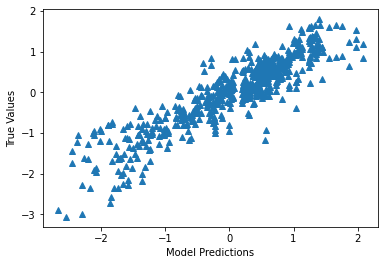

In [103]:
# plot the scaled result
plt.plot(y_test, y_predict, "^")
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [104]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


Text(0, 0.5, 'True Values')

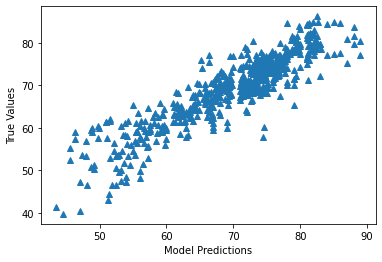

In [105]:
# plot the original values
plt.plot(y_test_orig, y_predict_orig, "^")
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [106]:
# plot the KPIs
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 3.987 
MSE = 15.895593 
MAE = 2.9406755 
R2 = 0.8119539396797141 
Adjusted R2 = 0.8049769657102335
